<a href="https://colab.research.google.com/github/IbrahimHammed/PythonVisualizations/blob/main/DiamondDatasetRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook builds a neural network to predict the price of diamond based on veriafied predictors**

In [38]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [16]:
# Connect to and open the required data
url = "https://github.com/IbrahimHammed/PythonVisualizations/blob/main/DiamondPrices2022.csv?raw=true"
dfRaw = pd.read_csv(url)

In [17]:
# Get general info about the dataset
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [18]:
# Preview the data. We can see we need to drop the 'unnamed:0' column
dfRaw.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
# Extract predictors
dfPredictors = dfRaw.drop(['Unnamed: 0', 'cut', 'color', 'clarity', 'price'], axis=1)
dfPredictors.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [20]:
# Check for the correlation of the predictors
dfPredictors.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.028234,0.181602,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.195333,0.183750,0.150915
x,0.975093,-0.025289,0.195333,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.970771,0.952005,1.000000


**We can see from the above that column 'table' is of little relevance to our model and needs to be dropped.**

In [21]:
dfPredictors = dfPredictors.drop(['table'], axis=1)
dfPredictors.head()

,carat,depth,x,y,z
0,0.23,61.5,3.95,3.98,2.43
1,0.21,59.8,3.89,3.84,2.31
2,0.23,56.9,4.05,4.07,2.31
3,0.29,62.4,4.20,4.23,2.63
4,0.31,63.3,4.34,4.35,2.75


<Axes: >

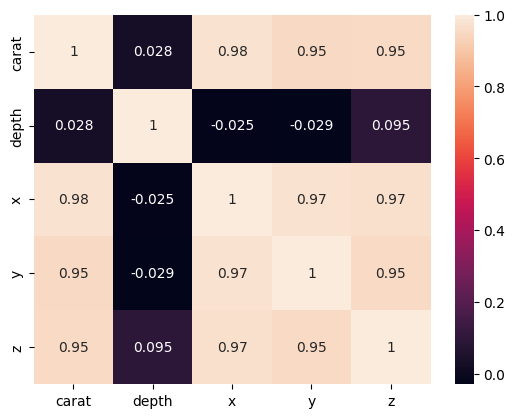

In [22]:
# View the correlation matrix in a graphical format
sns.heatmap(dfPredictors.corr(), annot=True)

In [23]:
# Extract price column from the raw dataframe
dfPrice = dfRaw['price']
dfPrice.head()

,price
0,326
1,326
2,327
3,334
4,335


In [25]:
# Data preprocessing and standardisation

x = dfPredictors.values
y = dfPrice.values

predictorScaler = StandardScaler()
targetScaler = StandardScaler()

x = predictorScaler.fit_transform(x)
y = targetScaler.fit_transform(y.reshape(-1,1))

In [27]:
# Split the data into training and testing sets. 70% will be used for training and 30% will be used for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
# Do a quick sanity check on available datasets
print("Shape of X-Training Dataset: {}".format(x_train.shape))
print("Shape of Y-Training Dataset: {}".format(y_train.shape))
print("Shape of X-Test Dataset: {}".format(x_test.shape))
print("Shape of Y-Test Dataset: {}".format(y_test.shape))

Shape of X-Training Dataset: (37760, 5)
Shape of Y-Training Dataset: (37760, 1)
Shape of X-Test Dataset: (16183, 5)
Shape of Y-Test Dataset: (16183, 1)


In [30]:
# Import libraries needed to build our neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [34]:
# Define the structure of our neural network
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
# Here I am using 128 neurons, 5 input (predictors)
model.add(Dense(units=128, input_dim=5, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
model.add(Dense(units=64, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
model.add(Dense(1, kernel_initializer='normal'))

In [35]:
# This section compiles the model we produced above
model.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
# This section trains the neural network with the training dataset
# It will loop through the dataset 20 times in batches of 32 records
model.fit(x_train, y_train ,batch_size = 32, epochs = 20, verbose=1)

Epoch 1/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1213
Epoch 2/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1251
Epoch 3/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1184
Epoch 4/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1180
Epoch 5/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1186
Epoch 6/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1190
Epoch 7/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1213
Epoch 8/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1196
Epoch 9/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1179
Epoch 10/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1179
Epoch 11/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1199
Epoch 12/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1217
Epoch 13/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1186
Epoch 14/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1184
Epoch 15/20
1180/1180 ━━━━━━━

In [40]:
# Make predictions with the trained model using text dataset (x_test)
predictions = model.predict(x_test)

506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [41]:
# This section evaluates the model
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse: .4f}")

r2 = r2_score(y_test, predictions)
print(f"R-Squared: {r2: .4f}")

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.4f}")

mape = mean_absolute_percentage_error(y_test, predictions)
print(f"Mean Absolute Percentage Error: {mape: .4f}")

506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1166
Test Loss: 0.11166108399629593
Mean Squared Error:  0.1117
R-Squared:  0.8852
Mean Absolute Error: 0.1925
Mean Absolute Percentage Error:  1.5742


**From the above we can see that the model is performing at 88.52% level with error of 1.57%. **